In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

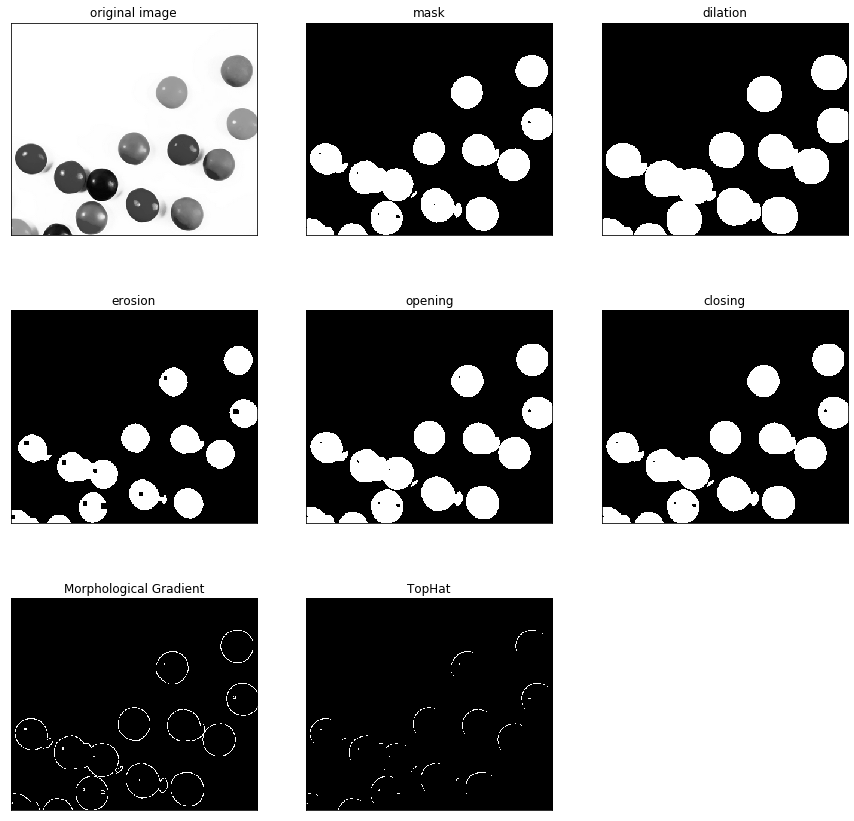

In [38]:
## to remove the spots in mask image we will use dilation

img = cv2.imread("smarties.png",cv2.IMREAD_GRAYSCALE)  #converting to graysclale compulsory
_,mask = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((2,2),np.uint8)  #kernel is a rectangle if we choose a bigger size then it would be better to remove dots

dilation = cv2.dilate(mask,kernel,iterations=5)  #iterations improves the quality the removing the dots completely
erosion = cv2.erode(mask,kernel,iterations=5)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)  #it is erosion followed by dilation
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)  #first dilation then erosion
mg = cv2.morphologyEx(mask,cv2.MORPH_GRADIENT,kernel)  #gives the difference between dilation and erosion of image
th = cv2.morphologyEx(mask,cv2.MORPH_TOPHAT,kernel)  #difference between input image and opening image
 
titles = ['original image','mask','dilation','erosion','opening','closing','Morphological Gradient','TopHat']
images = [img,mask,dilation,erosion,opening,closing,mg,th] 
plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()